<a href="https://colab.research.google.com/github/hdelgadog1/03MAIR-Algoritmo-de-Optimizacion/blob/master/Hugo_Delgado_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nombre : Hugo Delgado
https://colab.research.google.com/drive/1RIg0yoR8yZ4f7BkOGHEdh4LTVdZ95_uW?usp=sharing


In [ ]:
#Programacion Dinamica
#Problema Viaje por el rio
#Este problema tiene una complejidad O(n^3) dado que se observa 3 bucles

TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

In [ ]:
def Precios(TARIFAS):

  N=len(TARIFAS[0])

  PRECIOS = [[9999] * N for i in [9999]*N]
  RUTA = [[""]*N for i in [""]*N]

  for i in range(N-1):
    for j in range(i+1,N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i,j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
          MIN = PRECIOS[i][k]+TARIFAS[k][j]
          RUTA[i][j]=k
      PRECIOS[i][j] = MIN
  return PRECIOS,RUTA

PRECIOS,RUTA = Precios(TARIFAS)

print(PRECIOS)
print(RUTA)

def calcular_ruta(RUTA,desde,hasta):
  if desde == hasta:
    return desde
  else:
    return str(calcular_ruta(RUTA,desde,RUTA[desde][hasta])) + ' - ' + str(RUTA[desde][hasta])

calcular_ruta(RUTA,0,6)

[[9999, 5, 4, 3, 8, 8, 11], [9999, 9999, 999, 2, 3, 8, 7], [9999, 9999, 9999, 1, 6, 4, 7], [9999, 9999, 9999, 9999, 5, 6, 9], [9999, 9999, 9999, 9999, 9999, 999, 4], [9999, 9999, 9999, 9999, 9999, 9999, 3], [9999, 9999, 9999, 9999, 9999, 9999, 9999]]
[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]


'0 - 0 - 2 - 5'

In [ ]:
# Problema de Asignacion de tares. Ramificacion y poda

import itertools
from functools import wraps

def calcular_tiempo(f):
    @wraps(f)
    def cronometro(*args, **kwargs):
        t_inicial = time()
        salida = f(*args, **kwargs)
        t_final = time()
        print('Tiempo transcurrido (en segundos): {}'.format(t_final - t_inicial))
        return salida
    return cronometro

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]        

In [ ]:
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR

valor((0,1,2,3),COSTES)

73

In [ ]:
def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion= ''

  for S in list(itertools.permutations(range(len(COSTES)))):
    valor_temp = valor(S,COSTES)
    if valor_temp < mejor_valor:
      mejor_solucion = S
      mejor_valor = valor_temp
  print("La mejor solucion es:" , mejor_solucion)

fuerza_bruta(COSTES)

La mejor solucion es: (0, 3, 1, 2)


In [ ]:
def CI(S,COSTES):
  VALOR = 0

  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #estimaciones

  for i in range(len(COSTES)):
    if i not in S:
      VALOR += min([COSTES[i][j] for j in range(len(S), len(COSTES))]) 

  return VALOR

# (0,2)-> (0,2,1),(0,2,3)
# {'S':(0,2),'ci':34}

def crear_hijos(NODO,N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO+(i,)})
  return HIJOS
crear_hijos((0,2),4)




[{'s': (0, 2, 1)}, {'s': (0, 2, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  #(0,1,2,3)
  MEJOR_SOLUCION = tuple(i for i in range (DIMENSION))

  CotaSup = valor(MEJOR_SOLUCION,COSTES)

  NODOS=[]
  NODOS.append({'s':(),'ci': CI((),COSTES)})
#  NODOS.append({'s':(1),'ci': 34})
 # print(NODOS)

  iteracion = 0

  while(len(NODOS)>0):
    iteracion +=1
    print('\n#',iteracion)

    nodo_prometedor = min(NODOS, key = lambda x : x['ci'])

    #Hijos
    HIJOS = [{'s':x['s'],'ci':CI(x['s'],COSTES)} for x in crear_hijos(nodo_prometedor['s'],DIMENSION)]

    NODO_FINAL = [x for x in HIJOS if len(x['s'])== DIMENSION]
    if len (NODO_FINAL) > 0:
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL[0]
    
    #poda
    HIJOS = [x for x in HIJOS if x['ci']< CotaSup]

    #eliminamos el nodo expandido
    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor['s']]

    #Anadimos los hijos
    NODOS.extend(HIJOS)
    print(NODOS)

  print("La mejor solucion es",MEJOR_SOLUCION)


ramificacion_y_poda(COSTES)


# 1
[{'s': (0,), 'ci': 55}, {'s': (1,), 'ci': 55}, {'s': (2,), 'ci': 57}]

# 2
[{'s': (1,), 'ci': 55}, {'s': (2,), 'ci': 57}, {'s': (0, 1), 'ci': 65}, {'s': (0, 2), 'ci': 57}, {'s': (0, 3), 'ci': 65}]

# 3
[{'s': (2,), 'ci': 57}, {'s': (0, 1), 'ci': 65}, {'s': (0, 2), 'ci': 57}, {'s': (0, 3), 'ci': 65}, {'s': (1, 0), 'ci': 65}, {'s': (1, 2), 'ci': 63}, {'s': (1, 3), 'ci': 71}]

# 4
[{'s': (0, 1), 'ci': 65}, {'s': (0, 2), 'ci': 57}, {'s': (0, 3), 'ci': 65}, {'s': (1, 0), 'ci': 65}, {'s': (1, 2), 'ci': 63}, {'s': (1, 3), 'ci': 71}, {'s': (2, 0), 'ci': 65}, {'s': (2, 1), 'ci': 71}, {'s': (2, 3), 'ci': 71}]

# 5
[{'s': (0, 1), 'ci': 65}, {'s': (0, 3), 'ci': 65}, {'s': (1, 0), 'ci': 65}, {'s': (1, 2), 'ci': 63}, {'s': (1, 3), 'ci': 71}, {'s': (2, 0), 'ci': 65}, {'s': (2, 1), 'ci': 71}, {'s': (2, 3), 'ci': 71}, {'s': (0, 2, 1), 'ci': 69}, {'s': (0, 2, 3), 'ci': 69}]

# 6
[{'s': (0, 1), 'ci': 65}, {'s': (0, 3), 'ci': 65}, {'s': (1, 0), 'ci': 65}, {'s': (1, 3), 'ci': 71}, {'s': (2, 0), 'ci': 

In [ ]:
# Descenso del gradiente
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import random

In [ ]:
f = lambda X: X[0]**2+X[1]**2
df = lambda X:[2*X[0], 2*X[1]]


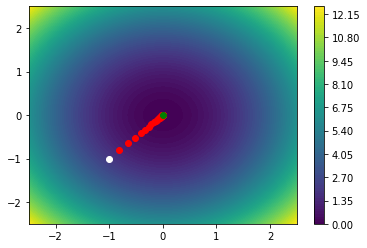

Solucion:  [-3.553431590273902e-49, -3.555775379208733e-49] 2.527041461414352e-97


In [ ]:
# preparar los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5
X = np.linspace(-rango,rango,resolucion)
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion, resolucion))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

# mapa de niveles Z

plt.contourf(X,Y,Z,resolucion)
plt.colorbar()
# punto aleatorio

P = [random.uniform(-2,2 ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c = "white")
#taza de aprendizaje
TA = .1
#iteraciones

for _ in range(500):
  grad = df(P)
  #print(P.grad)
  P[0],P[1] = P[0] - TA*grad[0],P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion: ", P, f(P) )

In [ ]:
# Otra funcion a minimizar
# sin(1/2*x^2-1/4*y^2+3) * cos(2*x+1-E^y)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for ir, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T)-f(PUNTO))/h
    return grad





<function __main__.<lambda>>